In [1]:
import skimage.io as io
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.feature import hog
import pandas as pd

In [2]:
img = io.imread('./dataset/download/tiki/img_22.jpeg')

In [3]:
img.shape

(480, 720, 3)

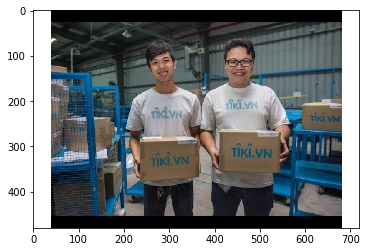

In [4]:
plt.imshow(img)

In [5]:
hog_feature, visualize_image = hog(img, visualize=True)

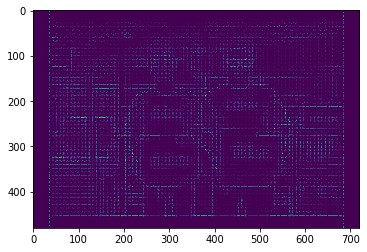

In [6]:
plt.imshow(visualize_image)

In [7]:
hog_feature.shape

(413424,)

In [8]:
tiki_label = pd.read_csv('./labels_tiki.csv', names=['label', 'x', 'y', 'w', 'h', 'img_name', 'raw_w', 'raw_h'])

In [9]:
tiki_label.head()

,label,x,y,w,h,img_name,raw_w,raw_h
0,tiki,3171,1344,592,389,img_0.png,5499,2582
1,tiki,25,4,116,46,img_1.jpg,800,800
2,tiki,362,42,100,43,img_1.jpg,800,800
3,tiki,99,38,491,197,img_7.jpg,700,400
4,tiki,28,38,32,24,img_8.jpg,600,315


In [10]:
boxes = tiki_label[tiki_label['img_name'] == 'img_22.jpeg']
boxes

,label,x,y,w,h,img_name,raw_w,raw_h
11,tiki,256,312,91,39,img_22.jpeg,720,480
12,tiki,432,284,99,54,img_22.jpeg,720,480
13,tiki,257,211,73,34,img_22.jpeg,720,480
14,tiki,422,194,75,34,img_22.jpeg,720,480
15,tiki,603,222,74,30,img_22.jpeg,720,480


Pandas(Index=11, label='tiki', x=256, y=312, w=91, h=39, img_name='img_22.jpeg', raw_w=720, raw_h=480)
256 312 91 39
Pandas(Index=12, label='tiki', x=432, y=284, w=99, h=54, img_name='img_22.jpeg', raw_w=720, raw_h=480)
432 284 99 54
Pandas(Index=13, label='tiki', x=257, y=211, w=73, h=34, img_name='img_22.jpeg', raw_w=720, raw_h=480)
257 211 73 34
Pandas(Index=14, label='tiki', x=422, y=194, w=75, h=34, img_name='img_22.jpeg', raw_w=720, raw_h=480)
422 194 75 34
Pandas(Index=15, label='tiki', x=603, y=222, w=74, h=30, img_name='img_22.jpeg', raw_w=720, raw_h=480)
603 222 74 30


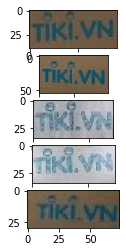

In [11]:
figure, axes = plt.subplots(len(boxes))
cropped = []

for i, box in enumerate(boxes.itertuples()):
    print(box)
    box_x, box_y, box_w, box_h = box.x, box.y, box.w, box.h
    print(box_x, box_y, box_w, box_h)
    cropped.append(img[box_y:box_y+box_h, box_x:box_x+box_w, :])
    axes[i].imshow(cropped[-1])

plt.show()

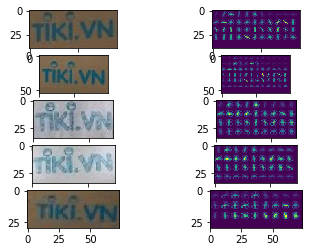

In [12]:
figure, axes = plt.subplots(len(cropped), 2)

for i, crop_img in enumerate(cropped):
    hog_feature, visualize_img = hog(crop_img, visualize=True)
    axes[i, 0].imshow(crop_img)
    axes[i, 1].imshow(visualize_img)